In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from random import sample
import math

red = pd.read_csv("winequality-red.csv",sep=";")
white = pd.read_csv("winequality-white.csv",sep=";")
master_red = [*range(len(red))]
master_white = [*range(len(white))]

### Create Training Set

train_white = pd.DataFrame()

rand_white = sample(range(math.floor(len(white))), math.floor(len(white)/2))
for i in rand_white:
    train_white = pd.concat((train_white,white.iloc[[i]]))


train_red = pd.DataFrame()

rand_red = sample(range(math.floor(len(red))), math.floor(len(red)/2))
for i in rand_red:
    train_red = pd.concat((train_red,red.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

training = pd.concat((train_red,train_white)).reset_index(drop=True)

#### Create Validation Set

val_red = pd.DataFrame()
val_white = pd.DataFrame()

test_red = pd.DataFrame()
test_white = pd.DataFrame()

rand_red = sample(range(math.floor(len(master_red))), math.floor(len(master_red)/2))
rand_white = sample(range(math.floor(len(master_white))), math.floor(len(master_white)/2))

for i in range(len(rand_red)):
    rand_red[i] = master_red[i]

for i in range(len(rand_white)):
    rand_white[i] = master_white[i]

for i in rand_red:
    val_red = pd.concat((val_red,red.iloc[[i]]))

for i in rand_white:
    val_white = pd.concat((val_white,white.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

validation = pd.concat((val_red,val_white)).reset_index(drop=True)

### Create Test Set

for i in master_red:
    test_red = pd.concat((test_red,red.iloc[[i]]))

for i in master_white:
    test_white = pd.concat((test_white,white.iloc[[i]]))

test = pd.concat((test_red,test_white)).reset_index(drop=True)

In [120]:
print(training)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               9.1             0.290         0.33            2.05      0.063  \
1               7.8             0.735         0.08            2.40      0.092   
2               6.4             0.865         0.03            3.20      0.071   
3               6.9             0.570         0.00            2.80      0.081   
4               8.8             0.610         0.30            2.80      0.088   
...             ...               ...          ...             ...        ...   
3243            6.9             0.380         0.29           13.65      0.048   
3244            6.1             0.340         0.21            5.00      0.042   
3245            6.8             0.520         0.32           13.20      0.044   
3246            7.6             0.160         0.41            1.90      0.047   
3247            6.8             0.230         0.32            1.60      0.026   

      free sulfur dioxide  

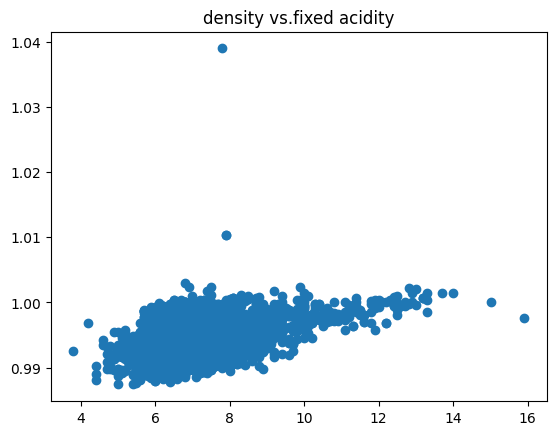

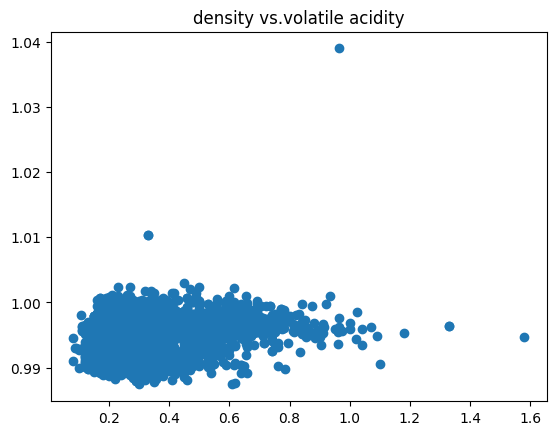

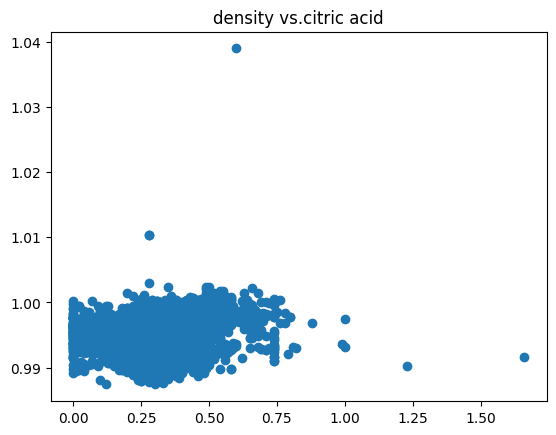

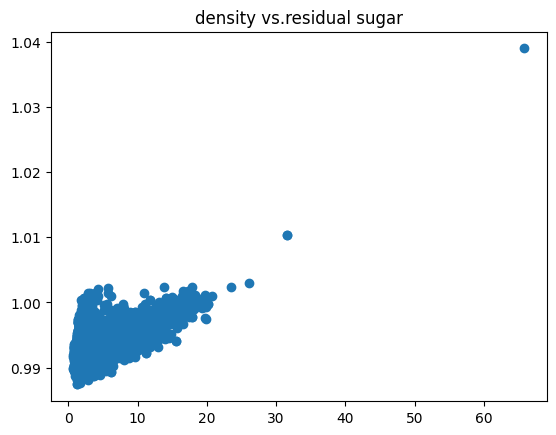

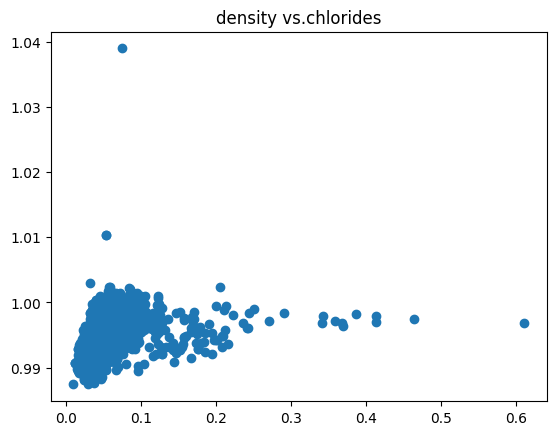

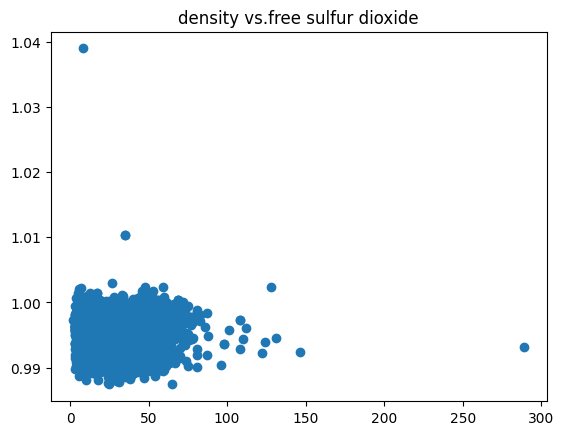

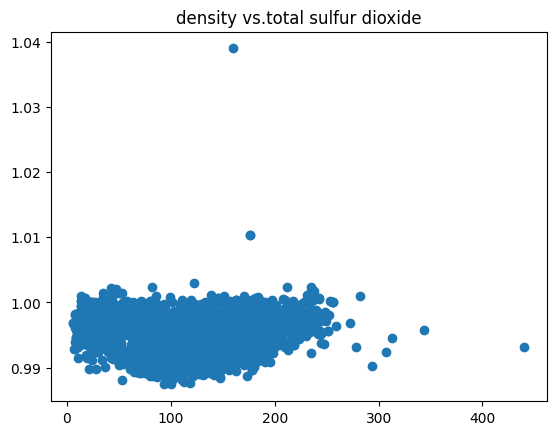

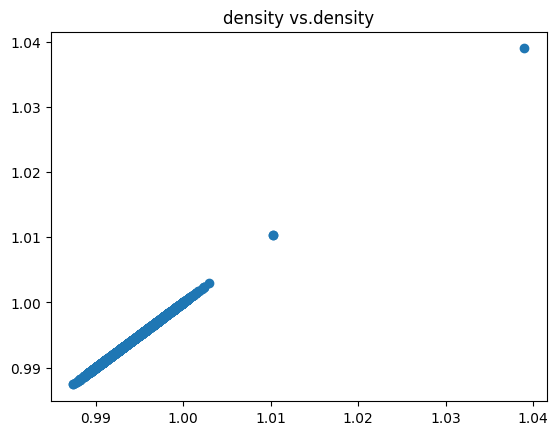

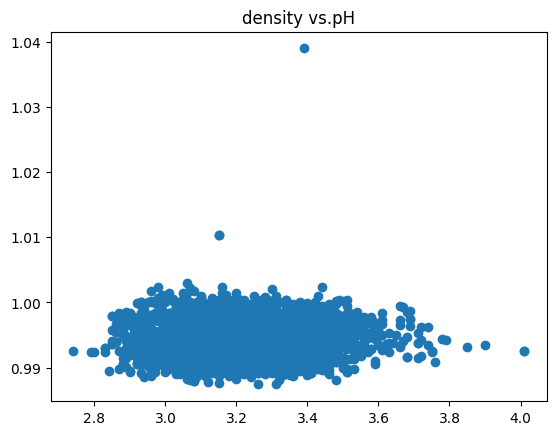

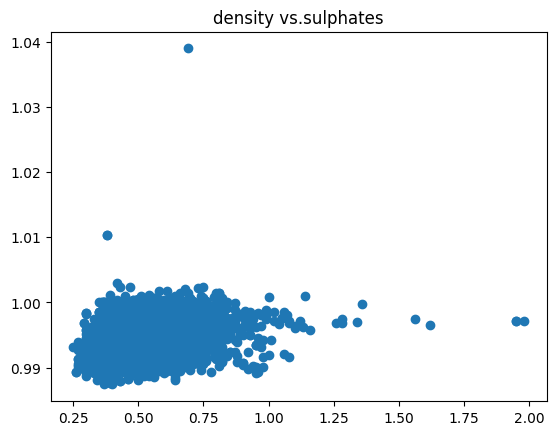

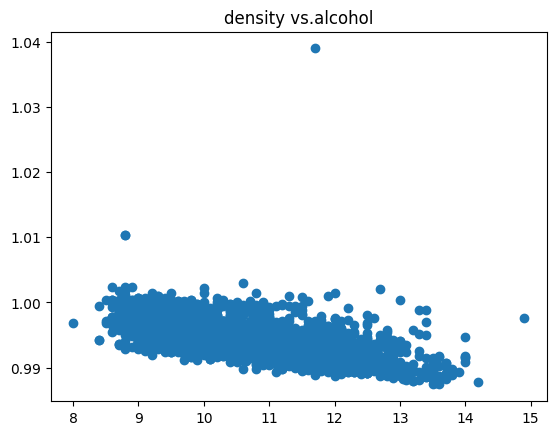

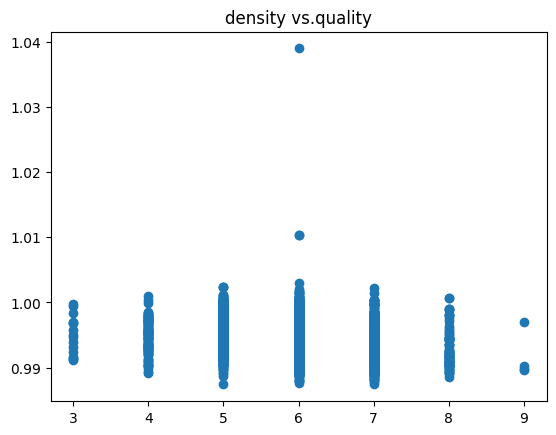

In [2]:
import matplotlib.pyplot as plt

for i in training.columns:
    var = i
    plt.scatter(training[var],training["density"])
    plt.title("density vs." + var)
    plt.show()


Based on the scatter plots, I choose alcohol (3), sulphates (5), fixed acidity (2), chlorides (4), and residual sugar (1)

Based on the scatter plots, I choose alcohol (3), sulphates (5), fixed acidity (2), chlorides (4), and residual sugar (1)

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
y = training["density"].to_numpy()

sugar = training["residual sugar"].to_numpy()
fa = training["fixed acidity"].to_numpy()
alcohol = training["alcohol"].to_numpy()
chloride = training["chlorides"].to_numpy()
sulphates = training["sulphates"].to_numpy()


### Just with residual sugar
x = sugar.reshape(-1,1)
regfit = reg.fit(x,y)
#print(regfit.score(x,y))
dens_pred = regfit.predict(x)
rss = sum((y-dens_pred)**2)
print(rss)
### Just with alcohol

x2 = alcohol.reshape(-1,1)
regfit2 = reg.fit(x2,y)
#print(regfit.score(x2,y))
dens_pred2 = regfit2.predict(x2)
rss = sum((y-dens_pred2)**2)
print(rss)
### Alcohol is has an RSS of 0.14!
### We'll add another variable (sugar)

x3 = np.array([alcohol,sugar])
x3 = x3.transpose()
regfit3 = reg.fit(x3,y)
#print(regfit3.score(x3,y))
dens_pred3 = regfit3.predict(x3)
rss = sum((y-dens_pred3)**2)
print(rss)

x4 = np.array([alcohol,fa])
x4 = x4.transpose()
regfit4 = reg.fit(x4,y)
#print(regfit4.score(x4,y))
dens_pred4 = regfit4.predict(x4)
rss = sum((y-dens_pred4)**2)
print(rss)

### Adding fixed acidity led to the greatest increase

x5 = np.array([alcohol,fa,sugar])
x5 = x5.transpose()
regfit5 = reg.fit(x5,y)
#print(regfit5.score(x5,y))
dens_pred5 = regfit5.predict(x5)
rss = sum((y-dens_pred5)**2)
print(rss)

### Adding the fourth variable

x6 = np.array([alcohol,fa,sugar,sulphates])
x6 = x6.transpose()
regfit6 = reg.fit(x6,y)
#print(regfit6.score(x6,y))
dens_pred6 = regfit6.predict(x6)
rss = sum((y-dens_pred6)**2)
print(rss)

### Adding the fifth variable

x7 = np.array([alcohol,fa,sugar,sulphates,chloride])
x7 = x7.transpose()
regfit7 = reg.fit(x7,y)
#print(regfit7.score(x7,y))
dens_pred7 = regfit7.predict(x7)
rss = sum((y-dens_pred7)**2)
print(rss)



0.020327687221626846
0.01668747976559071
0.012862073397065812
0.012161425039543655
0.00683568904260775
0.005511307019077926
0.005006066574681992


In [5]:
from sklearn.metrics import mean_squared_error

sugar = test["residual sugar"].to_numpy()
fa = test["fixed acidity"].to_numpy()
alcohol = test["alcohol"].to_numpy()
chloride = test["chlorides"].to_numpy()
sulphates = test["sulphates"].to_numpy()

x_test = np.array([alcohol,fa,sugar,sulphates,chloride])
x_test = x_test.transpose()
#print(regfit_test.score(x_test,y))
y_pred = regfit7.predict(x_test)
y_test = test["density"]

rss = sum((y_test-y_pred)**2)
print(rss)


mse = mean_squared_error(y_test, y_pred)
print(mse)

0.0021402214515005183
1.317059354769548e-06


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

Model accuracy score with criterion gini index: 0.8021
Training-set accuracy score: 0.7865
Training set score: 0.7865
Test set score: 0.8021
Model accuracy score with criterion entropy: 0.8021
Training-set accuracy score: 0.7865
Training set score: 0.7865
Test set score: 0.8021
Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]
              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

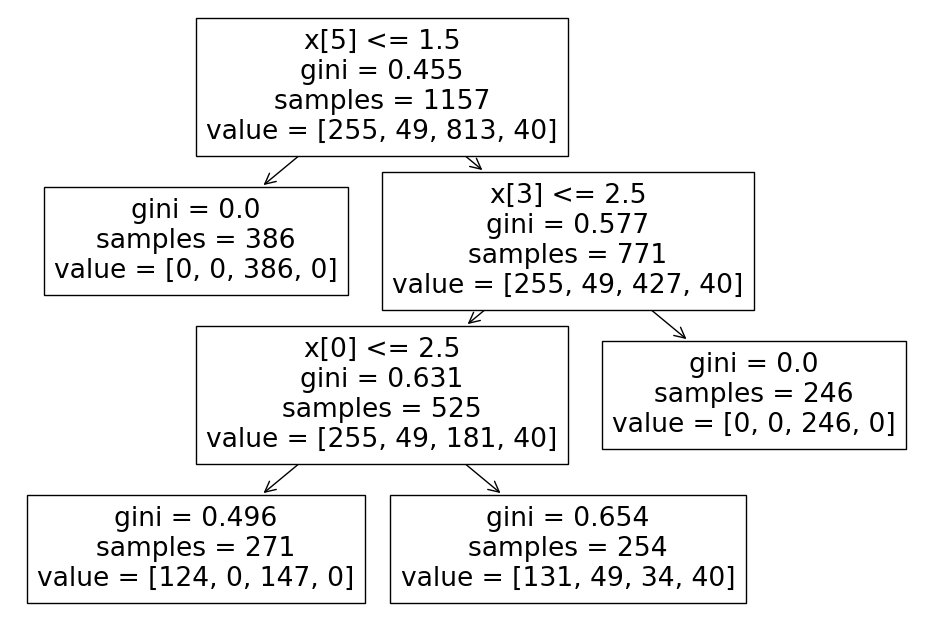

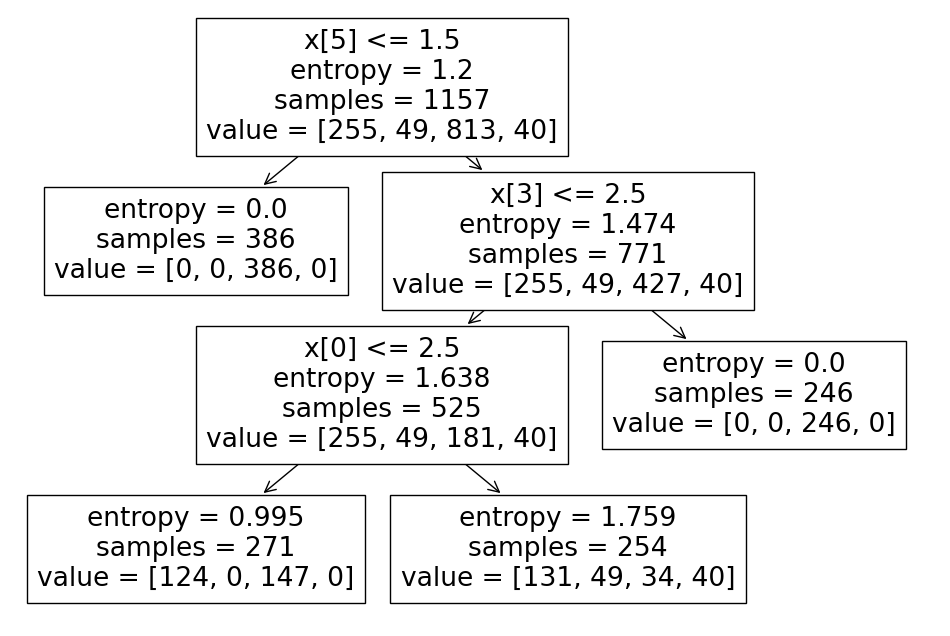

In [7]:
data = "car_evaluation.csv"
df = pd.read_csv(data, header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

X = df.drop(['class'], axis=1)

y = df['class']

# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# import category encoders

import category_encoders as ce

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

# Check accuracy with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

In [20]:
import numpy as np
import pandas as pd
import sklearn as skl
from random import sample
import math

red = pd.read_csv("winequality-red.csv",sep=";")
white = pd.read_csv("winequality-white.csv",sep=";")
master_red = [*range(len(red))]
master_white = [*range(len(white))]
red["color"] = "red"
white["color"] = "white"

### Create Training Set

train_white = pd.DataFrame()

rand_white = sample(range(math.floor(len(white))), math.floor(len(white)/2))
for i in rand_white:
    train_white = pd.concat((train_white,white.iloc[[i]]))


train_red = pd.DataFrame()

rand_red = sample(range(math.floor(len(red))), math.floor(len(red)/2))
for i in rand_red:
    train_red = pd.concat((train_red,red.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

training = pd.concat((train_red,train_white)).reset_index(drop=True)

#### Create Validation Set

val_red = pd.DataFrame()
val_white = pd.DataFrame()

test_red = pd.DataFrame()
test_white = pd.DataFrame()

rand_red = sample(range(math.floor(len(master_red))), math.floor(len(master_red)/2))
rand_white = sample(range(math.floor(len(master_white))), math.floor(len(master_white)/2))

for i in range(len(rand_red)):
    rand_red[i] = master_red[i]

for i in range(len(rand_white)):
    rand_white[i] = master_white[i]

for i in rand_red:
    val_red = pd.concat((val_red,red.iloc[[i]]))

for i in rand_white:
    val_white = pd.concat((val_white,white.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

validation = pd.concat((val_red,val_white)).reset_index(drop=True)

### Create Test Set

for i in master_red:
    test_red = pd.concat((test_red,red.iloc[[i]]))

for i in master_white:
    test_white = pd.concat((test_white,white.iloc[[i]]))

test = pd.concat((test_red,test_white)).reset_index(drop=True)



Model accuracy score with criterion gini index: 0.9594


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.061\ngini = 0.371\nsamples = 3248\nvalue = [799, 2449]'),
 Text(0.25, 0.5, 'x[2] <= 50.5\ngini = 0.07\nsamples = 2377\nvalue = [86, 2291]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 76\nvalue = [57, 19]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 2301\nvalue = [29, 2272]'),
 Text(0.75, 0.5, 'x[2] <= 113.5\ngini = 0.297\nsamples = 871\nvalue = [713, 158]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.071\nsamples = 703\nvalue = [677, 26]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.337\nsamples = 168\nvalue = [36, 132]')]

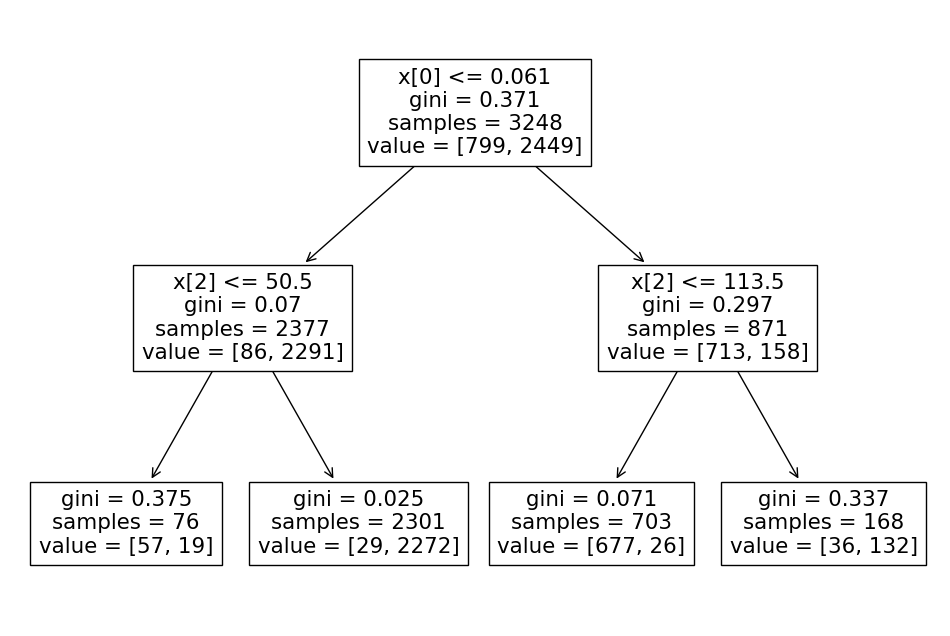

In [88]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
### I chose these variables because they produced decent results in the confusion matrix without a large discrepancy between the gini and entroy accuracies
selection = ["chlorides","free sulfur dioxide","total sulfur dioxide"]

x_train = training[selection]
y_train = training["color"]

x_test = test[selection]
y_test = test["color"]

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=3)


# fit the model
clf_gini.fit(x_train, y_train)

y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [89]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

y_pred_en = clf_en.predict(x_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

Model accuracy score with criterion entropy: 0.9575
Confusion matrix

 [[ 377   23]
 [  46 1179]]
              precision    recall  f1-score   support

         red       0.89      0.94      0.92       400
       white       0.98      0.96      0.97      1225

    accuracy                           0.96      1625
   macro avg       0.94      0.95      0.94      1625
weighted avg       0.96      0.96      0.96      1625



In [ ]:
import numpy as np
import pandas as pd
import sklearn as skl
from random import sample
import math

red = pd.read_csv("winequality-red.csv",sep=";")
white = pd.read_csv("winequality-white.csv",sep=";")
master_red = [*range(len(red))]
master_white = [*range(len(white))]

### Create Training Set

train_white = pd.DataFrame()

rand_white = sample(range(math.floor(len(white))), math.floor(len(white)/2))
for i in rand_white:
    train_white = pd.concat((train_white,white.iloc[[i]]))


train_red = pd.DataFrame()

rand_red = sample(range(math.floor(len(red))), math.floor(len(red)/2))
for i in rand_red:
    train_red = pd.concat((train_red,red.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

training = pd.concat((train_red,train_white)).reset_index(drop=True)

#### Create Validation Set

val_red = pd.DataFrame()
val_white = pd.DataFrame()

test_red = pd.DataFrame()
test_white = pd.DataFrame()

rand_red = sample(range(math.floor(len(master_red))), math.floor(len(master_red)/2))
rand_white = sample(range(math.floor(len(master_white))), math.floor(len(master_white)/2))

for i in range(len(rand_red)):
    rand_red[i] = master_red[i]

for i in range(len(rand_white)):
    rand_white[i] = master_white[i]

for i in rand_red:
    val_red = pd.concat((val_red,red.iloc[[i]]))

for i in rand_white:
    val_white = pd.concat((val_white,white.iloc[[i]]))

for i in rand_white:
    master_white.remove(i)

for i in rand_red:
    master_red.remove(i)

validation = pd.concat((val_red,val_white)).reset_index(drop=True)

### Create Test Set

for i in master_red:
    test_red = pd.concat((test_red,red.iloc[[i]]))

for i in master_white:
    test_white = pd.concat((test_white,white.iloc[[i]]))

test = pd.concat((test_red,test_white)).reset_index(drop=True)

In [97]:
from tensorflow import keras
from tensorflow.keras import layers

y = training["density"].to_numpy()
y.reshape(len(y),1)

sugar = training["residual sugar"].to_numpy()
sugar.reshape(len(sugar),1)
fa = training["fixed acidity"].to_numpy()
fa.reshape(len(fa),1)
alcohol = training["alcohol"].to_numpy()
alcohol.reshape(len(alcohol),1)
chloride = training["chlorides"].to_numpy()
chloride.reshape(len(chloride),1)
sulphates = training["sulphates"].to_numpy()
sulphates.reshape(len(sulphates),1)

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

model.compile(loss='mse', optimizer='adam')

model.fit(sugar,y, epochs=100,batch_size=10, verbose=0)

In [105]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[5]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

x = np.array([sugar,fa,alcohol,chloride,sulphates])
x = x.transpose()
model.compile(loss='mse', optimizer='adam')
model.fit(x,y, epochs=100,batch_size=10, verbose=0)

selection = ["residual sugar","fixed acidity","alcohol","chlorides","sulphates"]
x_test = test[selection].to_numpy()
model.predict(x_test)

51/51 [==============================] - 0s 560us/step


array([[0.99792874],
       [0.99792874],
       [0.9957831 ],
       ...,
       [0.9920689 ],
       [0.9950626 ],
       [0.9907866 ]], dtype=float32)